# SALES PREDICTION ANALYSIS

In [2]:
import pandas as pd

In [3]:
# Load the dataset
data = pd.read_csv("D:\Data Analytics Project\Sales Prediction analysis/advertising.csv")

# DATA PREPROCESSING

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
# Size of the Table
print('Size of the Table')
print('No. of Rows:',data.shape[0])
print('No. of Columns:',data.shape[1])

Size of the Table
No. of Rows: 200
No. of Columns: 4


In [7]:
# Checking null Values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# Description of the table
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# Sales through TV
tv_sale = data.sum()
tv_sale

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Sales         3026.1
dtype: float64

# DATA VISUALIZATION

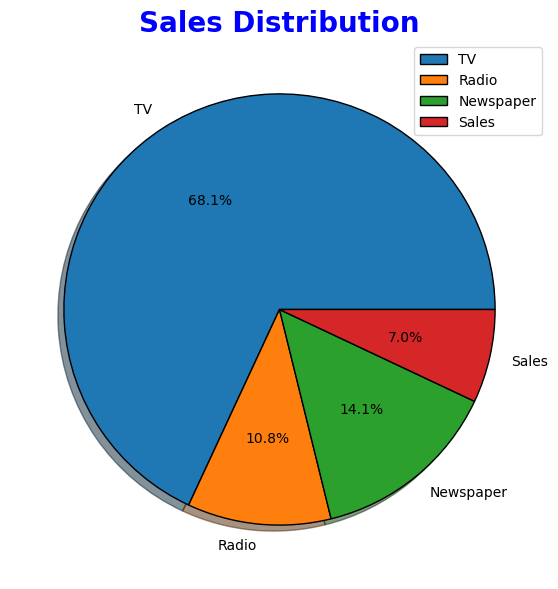

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
tv_sale.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},shadow=True)
plt.title('Sales Distribution',fontsize=20,fontweight='bold',color='blue')
plt.legend()
plt.show()

# PREDICTION USING CLASSIFICATION MODEL

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
data['SalesCategory'] = (data['Sales'] > 15).astype(int)

In [14]:
# Features and target
x = data[['TV','Radio','Newspaper']]
y = data['SalesCategory']

# Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Decision Tree Classifier

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
print('Accuracy:',(accuracy_score(y_test,y_pred)*100),'%')
print('Classification Report:')
print(classification_report(y_test,y_pred))
conf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 100.0 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
[[21  0]
 [ 0 19]]


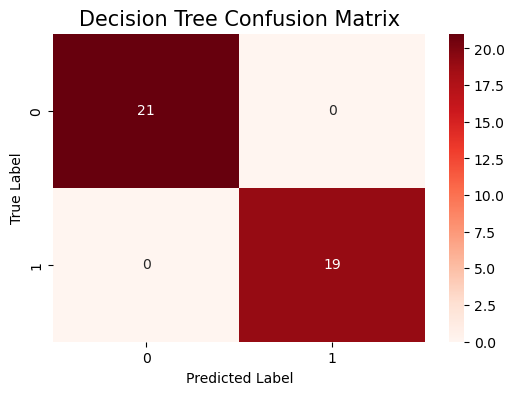

In [19]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds')
plt.title('Decision Tree Confusion Matrix',fontsize=15)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)
lr_classi_rep = classification_report(y_test,lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test,lr_y_pred)
print('Accuracy:',lr_accuracy*100,'%')
print('Classification Report:')
print(lr_classi_rep)
print('Confusion Matrix:')
print(lr_conf_matrix)

Accuracy: 100.0 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
[[21  0]
 [ 0 19]]


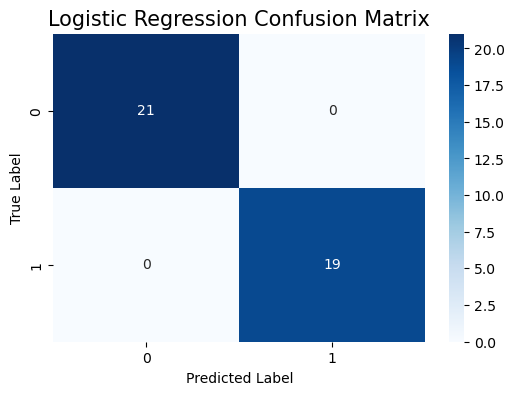

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(lr_conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Logistic Regression Confusion Matrix',fontsize=15)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Support Vector Machine

In [25]:
svm = SVC()
svm.fit(x_train,y_train)
svm_y_pred = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
svm_classi_rep = classification_report(y_test,svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test,svm_y_pred)
print('Accuracy :',svm_accuracy*100,'%')
print('Classification Report :')
print(svm_classi_rep)
print('Confusion Matrix :')
print(svm_conf_matrix)

Accuracy : 100.0 %
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix :
[[21  0]
 [ 0 19]]


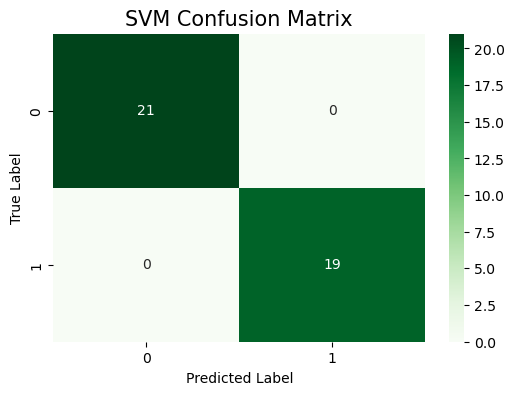

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(svm_conf_matrix,annot=True,fmt='d',cmap='Greens')
plt.title('SVM Confusion Matrix',fontsize=15)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest Classifier

In [29]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_y_pred = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
rfc_classi_rep = classification_report(y_test,rfc_y_pred)
rfc_conf_matrix = confusion_matrix(y_test,rfc_y_pred)
print('Accuracy :',rfc_accuracy*100,'%')
print('Classification Report :')
print(rfc_classi_rep)
print('Confusion Matrix :')
print(rfc_conf_matrix)

Accuracy : 100.0 %
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix :
[[21  0]
 [ 0 19]]


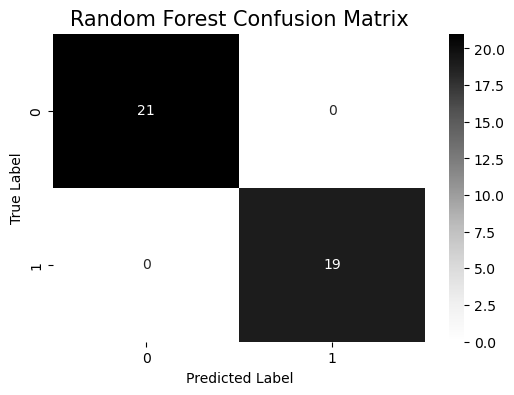

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(rfc_conf_matrix,annot=True,fmt='d',cmap='Greys')
plt.title('Random Forest Confusion Matrix',fontsize=15)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

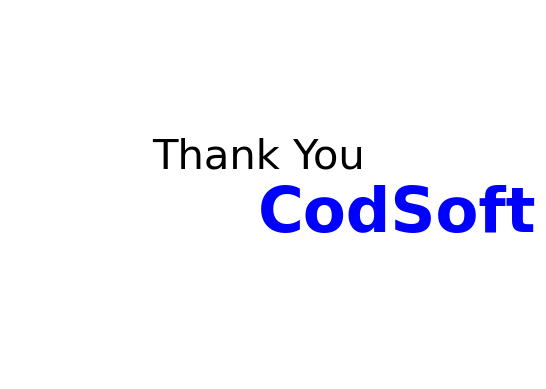

In [37]:
plt.figure()
plt.text(0.5,0.6,'Thank You',fontsize=30,ha='center',va='center')
plt.text(0.5,0.4,'CodSoft',fontsize=45,fontweight='bold',color='Blue')
plt.axis('off')
plt.show()